# Threshold Analysis

In [1]:
import pingouin as pg

from funcs.threshold_analysis import *
from funcs.plots import Fig3Thresholds

from scripts.stats import *
from scripts.utils import translate_conditions
from scripts.figure_params import *

### Set parameters

In [2]:
no_init = False

paradigms = ['Bayesian', 'Continuous', 'Cluster', '3AFC']
preds = ['none', 'time', 'frequency', 'both']

nReversals = 4  # for 3-AFC

freq_range = (125, 8000)
AFC_freqs = [125, 250, 500, 750, 1000, 1500, 2000, 3000, 4000, 6000, 8000]
xfreqs = list(np.geomspace(freq_range[0], freq_range[1], num=100))  # for resampling
PTA_freqs = [500, 1000, 2000, 4000]

In [3]:
# Paths
audiograms_path = os.path.join(get_path("audiograms"), 'no_init' if no_init else 'with_init')
data_path = get_path("dataframes")

In [4]:
stats = StatsFormatter()

### Load data

In [5]:
# Load data from Randomized paradigm
audiograms_100 = audiograms_to_df('Bayesian', audiograms_path, xfreqs, no_init=no_init)

# Load data from Continuous and Cluster paradigms
for pred in preds:
    audiograms_Continuous_pred = audiograms_to_df('Continuous', audiograms_path, xfreqs, pred=pred)
    audiograms_Cluster_pred = audiograms_to_df('Cluster', audiograms_path, xfreqs, pred=pred)
    # Add to DF
    audiograms_100 = pd.concat([audiograms_100,  audiograms_Continuous_pred, audiograms_Cluster_pred])

# Load data from 3-AFC paradigm
audiograms_3AFC = pd.read_pickle(os.path.join(data_path, f"3AFC_thresholds_{nReversals}rev.pkl"))

### Resample audiograms to 3-AFC frequencies

In [6]:
# Interpolate audiogram to the 11 frequencies used in 3-AFC
audiograms_3AFC = downsample_to_3AFC(audiograms_3AFC, audiograms_100, AFC_freqs, xfreqs)

### Preview and save dataframes

In [7]:
audiograms_3AFC.head()

,participant,paradigm,pred,time_pred,freq_pred,tested_frequencies,tested_levels,responses,len_init,thresholds,frequencies,mean_threshold,nReversals
0,cbtxie,3AFC,3AFC,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[30.0, 30.0, 10.0, 10.0, 0.0, 0.0, -10.0, -5.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0,6.9,125,-2.154545,4
1,cbtxie,3AFC,3AFC,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[30.0, 30.0, 10.0, 10.0, 0.0, 0.0, -10.0, -5.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0,6.2,250,-2.154545,4
2,cbtxie,3AFC,3AFC,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[30.0, 30.0, 10.0, 10.0, 0.0, 0.0, -10.0, -5.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0,0.0,500,-2.154545,4
3,cbtxie,3AFC,3AFC,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[30.0, 30.0, 10.0, 10.0, 0.0, 0.0, -10.0, -5.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0,-1.2,750,-2.154545,4
4,cbtxie,3AFC,3AFC,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 1000....","[30.0, 30.0, 10.0, 10.0, 0.0, 0.0, -10.0, -5.0...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...",0,-1.2,1000,-2.154545,4


In [8]:
audiograms_100.head()

,participant,paradigm,pred,time_pred,freq_pred,tested_frequencies,tested_levels,responses,len_init,thresholds,frequencies,mean_threshold
0,nunamh,Bayesian,Bayesian,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, -10.0, 10.0, -10...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",22,8.966314,125.000000,1.324109
1,nunamh,Bayesian,Bayesian,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, -10.0, 10.0, -10...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",22,8.623549,130.362973,1.324109
2,nunamh,Bayesian,Bayesian,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, -10.0, 10.0, -10...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",22,8.239123,135.956037,1.324109
3,nunamh,Bayesian,Bayesian,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, -10.0, 10.0, -10...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",22,7.789474,141.789065,1.324109
4,nunamh,Bayesian,Bayesian,None,None,"[1000.0, 1000.0, 1000.0, 1000.0, 1500.0, 1500....","[60.0, 40.0, 20.0, 0.0, 10.0, -10.0, 10.0, -10...","[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, ...",22,7.330968,147.872352,1.324109


In [9]:
participants = audiograms_3AFC.participant.unique()
print(len(participants), "participants:")
print(participants)

28 participants:
['cbtxie' 'cmzntn' 'cwzopc' 'ddmfvc' 'eqdcwr' 'erfnpg' 'hnxrev' 'hoavur'
 'klxufm' 'luctew' 'moiern' 'nefynm' 'nfsmrp' 'nlhglm' 'nunamh' 'ofgjwt'
 'qmbami' 'quicsb' 'quvsxs' 'rdzaqd' 'regvnx' 'rehvhf' 'tlvjds' 'tsbvqq'
 'udoety' 'vqnuwy' 'wfoooa' 'wxbjqe']


In [10]:
# Save DataFrames
audiograms_3AFC.to_pickle(os.path.join(data_path, "thresholds-3AFC_freqs.pkl"))
audiograms_100.to_pickle(os.path.join(data_path, "thresholds-100_freqs.pkl"))

### Fig3 - 3AFC vs Randomized

A - 3-AFC vs. Randomized average audiograms
B - 3-AFC vs. Randomized average threshold
C - 3-AFC vs. Randomized average PTA

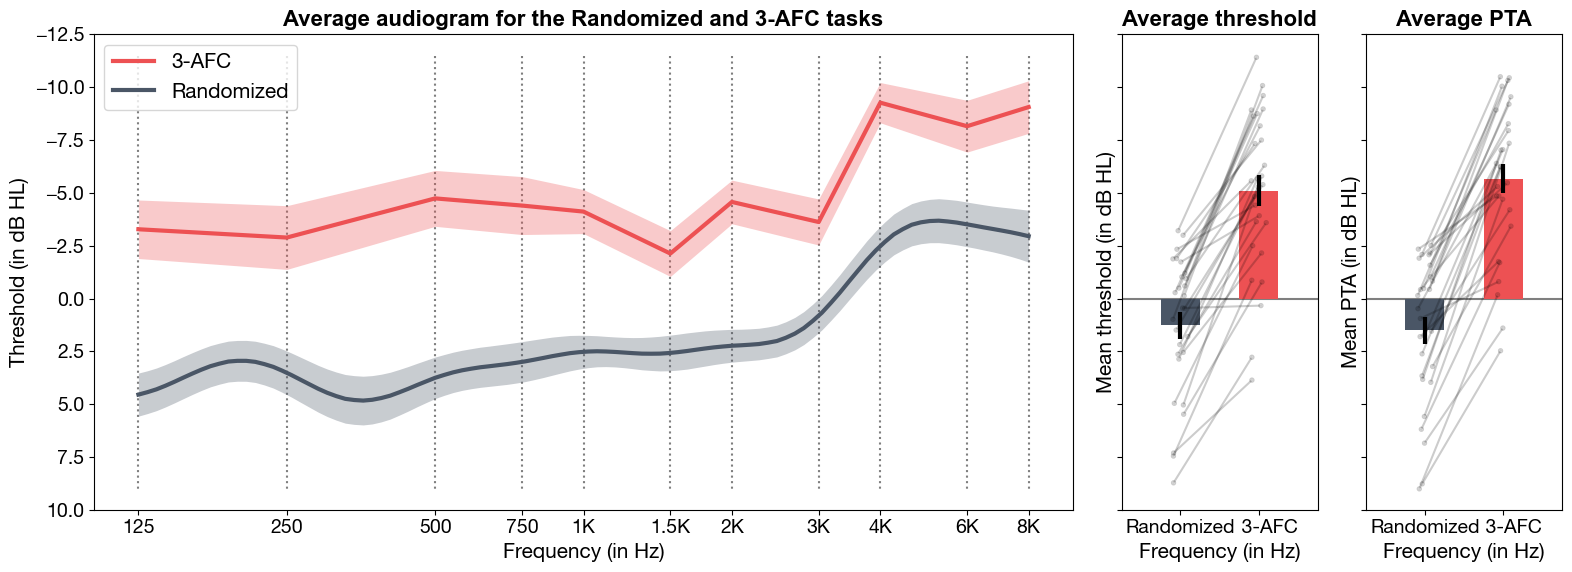

In [11]:
update_plot_params()

fig, axes = plt.subplots(1, 3, figsize=[16, 6], sharey='all',
                         gridspec_kw={'width_ratios': [5, 1, 1]})

# 3AFC vs Randomized Average Audiograms
plt.sca(axes[0])
Fig3Thresholds.plot_3afc_vs_randomized_audiogram(
    Fig3Thresholds, audiograms_3AFC[audiograms_3AFC.paradigm == '3AFC'],
    audiograms_100[audiograms_100.paradigm == 'Bayesian'], AFC_freqs, xfreqs)

# Average threshold
plt.sca(axes[1])
# Average over all tested frequencies
Fig3Thresholds.barplot_3afc_vs_randomized(
    audiograms_3AFC.loc[audiograms_3AFC.paradigm.isin(['3AFC', 'Bayesian'])],
    'threshold')

# Average PTA
plt.sca(axes[2])
# Filter frequencies relevant for PTA
Fig3Thresholds.barplot_3afc_vs_randomized(
    audiograms_3AFC.loc[audiograms_3AFC.paradigm.isin(['3AFC', 'Bayesian']) &
                        audiograms_3AFC.frequencies.isin(PTA_freqs)],
    'PTA')
plt.tight_layout()

# Save figure
plt.savefig(os.path.join(get_path('figures'), 'Fig3-thresholds_comparison-3AFC_vs_Bayesian.svg'))

### Stats

#### Descriptive stats

In [12]:
#TODO: add descriptive stats for thresholds (maybe use function 'print_descriptive_stats' from p50_analysis?


#### T-test on the mean threshold across paradigms

In [13]:
# Filter data for mean threshold comparison
thresholds_data = audiograms_3AFC.loc[audiograms_3AFC.paradigm.isin(['3AFC', 'Bayesian']) & (audiograms_3AFC.frequencies == 125)]

# Threshold comparison (Paired T-test)
pairwise_results = pg.pairwise_tests(data=thresholds_data, dv='mean_threshold', within='paradigm',
                                      subject='participant', effsize='cohen', alternative='two-sided')

# Display T-test results
stats.print_paired_ttest(stats, pairwise_results, "Mean threshold")

Mean threshold comparison (paired T-test):
3AFC vs Bayesian: T(27) = -13.24, p = <0.001     *



#### ANOVA on the audiograms (factors: task, frequency)

In [14]:
# Filter data for audiogram comparison
audiograms_data = audiograms_3AFC.loc[audiograms_3AFC.paradigm.isin(['3AFC', 'Bayesian'])]

# Two-way ANOVA (paradigm, frequency) on the thresholds:
aov_threshold = pg.rm_anova(data=audiograms_data,
                            dv='thresholds',
                            within=['paradigm', 'frequencies'],
                            subject="participant")  # , detailed=True)

stats.print_2way_anova(stats, aov_threshold, "thresholds", ['paradigm', 'frequencies'])

Two-way ANOVA (paradigm, frequencies) on the thresholds: 

Source                   F        ddof1  ddof2   p-unc    sig
paradigm                 175.21    1      27     <0.001    *
frequencies              11.06     10     270    <0.001    *
paradigm * frequencies   2.32      10     270    0.013     *



#### Post-hoc paired T-test

In [15]:
# Post-hoc pairwise comparisons
pairwise_results = pg.pairwise_tests(data=audiograms_data,
                                     dv='thresholds',
                                     within=['paradigm', 'frequencies'],
                                     subject='participant',
                                     alternative='two-sided',
                                     padjust=StatsParams.mult_comp)

# Display post-hoc results
stats.print_paired_ttest_posthocs(pairwise_results)

Post-hoc tests (paired t-tests):
paradigm / 3AFC vs Bayesian: T(27) = -13.24, p = <0.001 (fdr_bh: nan)
frequencies / 125 vs 250: T(27) = 0.37, p = 0.713 (fdr_bh: 0.839)
frequencies / 125 vs 500: T(27) = 1.46, p = 0.156 (fdr_bh: 0.277)
frequencies / 125 vs 750: T(27) = 1.65, p = 0.111 (fdr_bh: 0.226)
frequencies / 125 vs 1000: T(27) = 1.48, p = 0.151 (fdr_bh: 0.277)
frequencies / 125 vs 1500: T(27) = 0.35, p = 0.733 (fdr_bh: 0.839)
frequencies / 125 vs 2000: T(27) = 1.46, p = 0.155 (fdr_bh: 0.277)
frequencies / 125 vs 3000: T(27) = 1.76, p = 0.090 (fdr_bh: 0.190)
frequencies / 125 vs 4000: T(27) = 5.20, p = <0.001 (fdr_bh: <0.001)     *
frequencies / 125 vs 6000: T(27) = 4.34, p = <0.001 (fdr_bh: <0.001)     *
frequencies / 125 vs 8000: T(27) = 4.24, p = <0.001 (fdr_bh: <0.001)     *
frequencies / 250 vs 500: T(27) = 1.12, p = 0.271 (fdr_bh: 0.414)
frequencies / 250 vs 750: T(27) = 1.07, p = 0.293 (fdr_bh: 0.435)
frequencies / 250 vs 1000: T(27) = 1.15, p = 0.260 (fdr_bh: 0.409)
frequen

### Some stuff we tried

In [16]:
audiograms_3AFC['pred'] = audiograms_3AFC['pred'].apply(lambda x: translate_conditions(x) if x in preds else x)

Compare thresholds

In [17]:
paradigms_data = audiograms_3AFC.loc[audiograms_3AFC.pred.isin(['3AFC', 'Bayesian', 'R']), ['paradigm', 'participant', 'mean_threshold']].drop_duplicates()

# One-way ANOVA (paradigm) on the thresholds:
paradigms_aov = pg.rm_anova(data=paradigms_data,
                            dv='mean_threshold',
                            within=['paradigm'],
                            subject="participant")  # , detailed=True)

stats.print_1way_anova(stats, paradigms_aov, "mean thresholds", ['paradigm'])


# Post-hoc pairwise comparisons
paradigms_posthocs = pg.pairwise_tests(data=paradigms_data,
                                     dv='mean_threshold',
                                     within=['paradigm'],
                                     subject='participant',
                                     alternative='two-sided',
                                     padjust=StatsParams.mult_comp)

# Display post-hoc results
stats.print_paired_ttest_posthocs(paradigms_posthocs)

One-way ANOVA on the mean thresholds (factor: ['paradigm']):
paradigm: F(3, 81) = 102.98, p = <0.001     *

Post-hoc tests (paired t-tests):
paradigm / 3AFC vs Bayesian: T(27) = -13.24, p = <0.001 (fdr_bh: <0.001)     *
paradigm / 3AFC vs Cluster: T(27) = -9.71, p = <0.001 (fdr_bh: <0.001)     *
paradigm / 3AFC vs Continuous: T(27) = -13.73, p = <0.001 (fdr_bh: <0.001)     *
paradigm / Bayesian vs Cluster: T(27) = 6.18, p = <0.001 (fdr_bh: <0.001)     *
paradigm / Bayesian vs Continuous: T(27) = 2.65, p = 0.013 (fdr_bh: 0.013)     *
paradigm / Cluster vs Continuous: T(27) = -2.78, p = 0.010 (fdr_bh: 0.012)     *



Continuous

In [18]:
continuous_data = audiograms_3AFC.loc[audiograms_3AFC.paradigm == 'Continuous', ['paradigm', 'pred', 'participant', 'mean_threshold']].drop_duplicates()

# One-way ANOVA (paradigm) on the thresholds:
continuous_aov = pg.rm_anova(data=continuous_data,
                            dv='mean_threshold',
                            within=['pred'],
                            subject="participant")  # , detailed=True)

stats.print_1way_anova(stats, continuous_aov, "mean thresholds", ['pred'])


# Post-hoc pairwise comparisons
continuous_posthocs = pg.pairwise_tests(data=continuous_data,
                                       dv='mean_threshold',
                                       within=['pred'],
                                       subject='participant',
                                       alternative='two-sided',
                                       padjust=StatsParams.mult_comp)

# Display post-hoc results
stats.print_paired_ttest_posthocs(continuous_posthocs)

One-way ANOVA on the mean thresholds (factor: ['pred']):
pred: F(3, 81) = 3.25, p = 0.026     *

Post-hoc tests (paired t-tests):
pred / F vs FT: T(27) = 2.54, p = 0.017 (fdr_bh: 0.084)
pred / F vs R: T(27) = -0.09, p = 0.930 (fdr_bh: 0.930)
pred / F vs T: T(27) = 1.48, p = 0.150 (fdr_bh: 0.215)
pred / FT vs R: T(27) = -2.32, p = 0.028 (fdr_bh: 0.084)
pred / FT vs T: T(27) = -1.38, p = 0.179 (fdr_bh: 0.215)
pred / R vs T: T(27) = 1.49, p = 0.148 (fdr_bh: 0.215)



Cluster

In [19]:
cluster_data = audiograms_3AFC.loc[audiograms_3AFC.paradigm == 'Cluster', ['paradigm', 'pred', 'participant', 'mean_threshold']].drop_duplicates()

# One-way ANOVA (paradigm) on the thresholds:
cluster_aov = pg.rm_anova(data=cluster_data,
                             dv='mean_threshold',
                             within=['pred'],
                             subject="participant")  # , detailed=True)

stats.print_1way_anova(stats, cluster_aov, "mean thresholds", ['pred'])


# Post-hoc pairwise comparisons
cluster_posthocs = pg.pairwise_tests(data=cluster_data,
                                        dv='mean_threshold',
                                        within=['pred'],
                                        subject='participant',
                                        alternative='two-sided',
                                        padjust=StatsParams.mult_comp)

# Display post-hoc results
stats.print_paired_ttest_posthocs(cluster_posthocs)

One-way ANOVA on the mean thresholds (factor: ['pred']):
pred: F(3, 81) = 9.40, p = <0.001     *

Post-hoc tests (paired t-tests):
pred / F vs FT: T(27) = 0.63, p = 0.536 (fdr_bh: 0.643)
pred / F vs R: T(27) = -4.39, p = <0.001 (fdr_bh: <0.001)     *
pred / F vs T: T(27) = -0.13, p = 0.899 (fdr_bh: 0.899)
pred / FT vs R: T(27) = -4.46, p = <0.001 (fdr_bh: <0.001)     *
pred / FT vs T: T(27) = -0.89, p = 0.382 (fdr_bh: 0.572)
pred / R vs T: T(27) = 3.77, p = <0.001 (fdr_bh: 0.002)     *



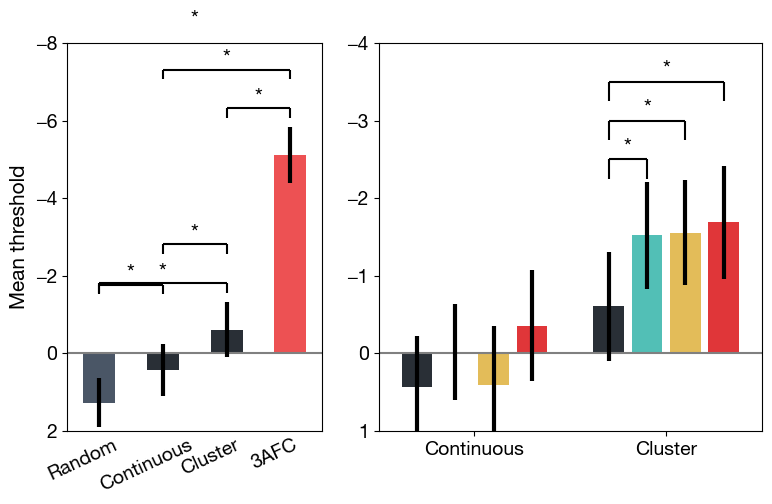

In [20]:
from funcs.plots import Fig4p50

fig = Fig4p50().p50_barplot('mean_threshold', paradigms_data, continuous_data, cluster_data, paradigms_posthocs, continuous_posthocs, cluster_posthocs)

### Cluster vs. Continuous 2-way ANOVAs

In [21]:
# Two-way ANOVA (paradigm, pred) on the thresholds:
aov_threshold = pg.rm_anova(data=audiograms_3AFC.loc[audiograms_3AFC.paradigm.isin(['Continuous', 'Cluster'])],
                            dv='thresholds',
                            within=['paradigm', 'pred'],
                            subject="participant")  # , detailed=True)

stats.print_2way_anova(stats, aov_threshold, "mean thresholds", ['paradigm', 'pred'])

Two-way ANOVA (paradigm, pred) on the mean thresholds: 

Source                   F        ddof1  ddof2   p-unc    sig
paradigm                 29.77     1      27     <0.001    *
pred                     8.75      3      81     <0.001    *
paradigm * pred          2.19      3      81     0.096     



In [22]:
# Two-way ANOVA (time_pred, freq_pred) on the thresholds:
aov_threshold = pg.rm_anova(data=audiograms_3AFC.loc[audiograms_3AFC.paradigm.isin(['Continuous', 'Cluster'])],
                            dv='thresholds',
                            within=['time_pred', 'freq_pred'],
                            subject="participant")  # , detailed=True)

stats.print_2way_anova(stats, aov_threshold, "mean thresholds", ['time_pred', 'freq_pred'])

Two-way ANOVA (time_pred, freq_pred) on the mean thresholds: 

Source                   F        ddof1  ddof2   p-unc    sig
time_pred                13.33     1      27     0.001     *
freq_pred                7.84      1      27     0.009     *
time_pred * freq_pred    1.09      1      27     0.305     

